<a href="https://colab.research.google.com/github/74527mohammad/Python/blob/main/p335_EDA_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [60]:
#loading the dataset
df = pd.read_csv("/content/Tesla Inc.csv")
df

,Date,Close/Last,Volume,Open,High,Low
0,01/05/2024,$181.18,62379660,$181.99,$182.76,$180.17
1,01/04/2024,$181.91,71983570,$182.15,$183.0872,$180.88
2,01/03/2024,$184.25,58414460,$184.22,$185.88,$183.43
3,01/02/2024,$185.64,82488670,$187.15,$188.44,$183.885
4,12/29/2023,$192.53,42672150,$193.90,$194.40,$191.725
...,...,...,...,...,...,...
2513,01/10/2014,$19.0336,304941998,$19.2797,$19.3143,$18.9682
2514,01/09/2014,$19.1614,279051080,$19.5286,$19.5307,$19.1197
2515,01/08/2014,$19.4093,256633533,$19.2432,$19.4843,$19.2389
2516,01/07/2014,$19.2871,320691432,$19.44,$19.4986,$19.2116


In [61]:
df.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [62]:
df['Open'] = pd.to_numeric(df['Open'].str.replace('[\$,]', '', regex=True), errors='coerce')

In [63]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/05/2024,$181.18,62379660,181.99,$182.76,$180.17
1,01/04/2024,$181.91,71983570,182.15,$183.0872,$180.88
2,01/03/2024,$184.25,58414460,184.22,$185.88,$183.43
3,01/02/2024,$185.64,82488670,187.15,$188.44,$183.885
4,12/29/2023,$192.53,42672150,193.90,$194.40,$191.725


In [64]:
df.isna().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [65]:
df.duplicated().sum()

0

In [66]:
df.rename(columns={'Close/Last': 'Close'}, inplace=True)
df.head()

,Date,Close,Volume,Open,High,Low
0,01/05/2024,$181.18,62379660,181.99,$182.76,$180.17
1,01/04/2024,$181.91,71983570,182.15,$183.0872,$180.88
2,01/03/2024,$184.25,58414460,184.22,$185.88,$183.43
3,01/02/2024,$185.64,82488670,187.15,$188.44,$183.885
4,12/29/2023,$192.53,42672150,193.90,$194.40,$191.725


In [67]:
# Define function to convert datetime format and remove dollar sign

def clean_data(df):

    df['Date'] = pd.to_datetime(df['Date'])

    #grouping the columns which needs to be rounded off
    sorted_columns = ['Close', 'Open', 'High', 'Low']

    df[sorted_columns] = df[sorted_columns].replace('[\$,]', '', regex=True).astype(float)

    # Round off numeric columns to 2 decimal places
    df[sorted_columns] = df[sorted_columns].round(2)

    # Return the cleaned DataFrame
    return df

In [68]:
#applying new cleaned data
df = clean_data(df)
df

,Date,Close,Volume,Open,High,Low
0,2024-01-05,181.18,62379660,181.99,182.76,180.17
1,2024-01-04,181.91,71983570,182.15,183.09,180.88
2,2024-01-03,184.25,58414460,184.22,185.88,183.43
3,2024-01-02,185.64,82488670,187.15,188.44,183.88
4,2023-12-29,192.53,42672150,193.90,194.40,191.72
...,...,...,...,...,...,...
2513,2014-01-10,19.03,304941998,19.28,19.31,18.97
2514,2014-01-09,19.16,279051080,19.53,19.53,19.12
2515,2014-01-08,19.41,256633533,19.24,19.48,19.24
2516,2014-01-07,19.29,320691432,19.44,19.50,19.21


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   Close   2518 non-null   float64       
 2   Volume  2518 non-null   int64         
 3   Open    2518 non-null   float64       
 4   High    2518 non-null   float64       
 5   Low     2518 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.2 KB


In [70]:
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,Close,Volume,Open,High,Low
0,2024-01-05,181.18,62379660,181.99,182.76,180.17
1,2024-01-04,181.91,71983570,182.15,183.09,180.88
2,2024-01-03,184.25,58414460,184.22,185.88,183.43
3,2024-01-02,185.64,82488670,187.15,188.44,183.88
4,2023-12-29,192.53,42672150,193.90,194.40,191.72
...,...,...,...,...,...,...
2513,2014-01-10,19.03,304941998,19.28,19.31,18.97
2514,2014-01-09,19.16,279051080,19.53,19.53,19.12
2515,2014-01-08,19.41,256633533,19.24,19.48,19.24
2516,2014-01-07,19.29,320691432,19.44,19.50,19.21


In [71]:
df[["Close","Volume","Open","High","Low"]].describe()

,Close,Volume,Open,High,Low
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,78.134357,1.360511e+08,78.071029,78.920000,77.272863
std,56.336637,8.352408e+07,56.284065,56.919895,55.692880
min,17.850000,2.404834e+07,17.680000,17.910000,17.630000
25%,29.835000,8.120679e+07,29.785000,30.000000,29.580000
50%,48.290000,1.119380e+08,48.165000,48.665000,47.850000
75%,134.825000,1.660393e+08,134.912500,136.370000,133.482500
max,198.110000,1.065209e+09,198.020000,199.620000,197.000000


Inference drawn from Descriptive Statistics Summary:

Close/Last:

-  Mean: 78.13 Dollars, suggesting a moderate average price over the period.

-  Median: 48.29 Dollars, indicating half of the closing prices were above and half below this value, suggesting a positively skewed distribution.

-  Standard Deviation: 56.34 Dollars, reflecting substantial price variability.
Range: 17.85 Dollars to 198.11 Dollars, demonstrating a wide price span.



Volume:

-  Mean: 1.36 billion shares per day, signifying active trading.

-  Median: 1.12 billion shares, suggesting that half of the trading days had higher volumes.


-  Standard Deviation: 835 million shares, reflecting variation in trading activity.

Open, High, and Low Prices:

-  Similar means and medians to closing prices, suggesting consistency in price movements.
- High standard deviations, indicating daily price fluctuations.

Text(0, 0.5, 'Values (Billion $)')

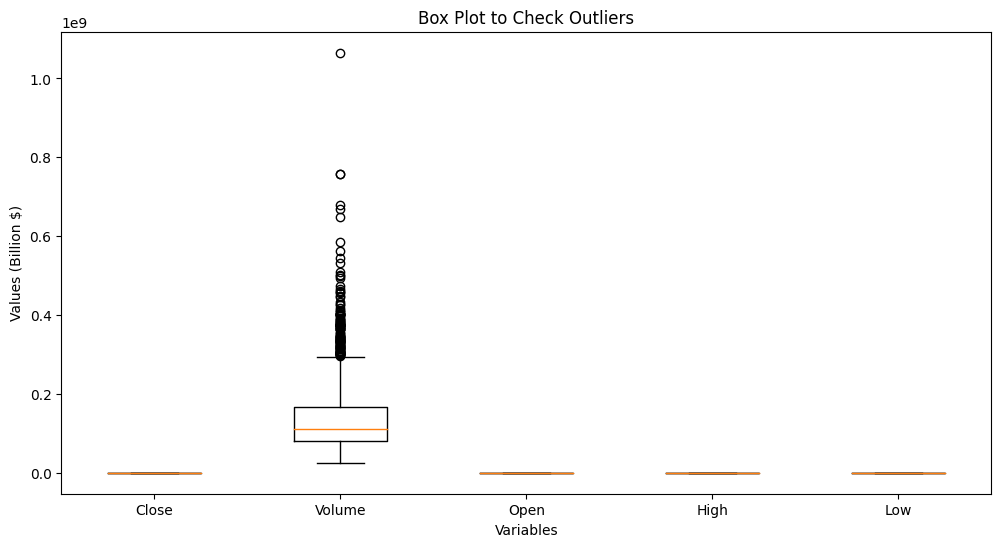

In [72]:
plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(df[['Close', 'Volume', 'Open', 'High', 'Low']].values, labels=['Close', 'Volume', 'Open', 'High', 'Low'])

# Set titles and labels
plt.title('Box Plot to Check Outliers')
plt.xlabel('Variables')
plt.ylabel('Values (Billion $)')

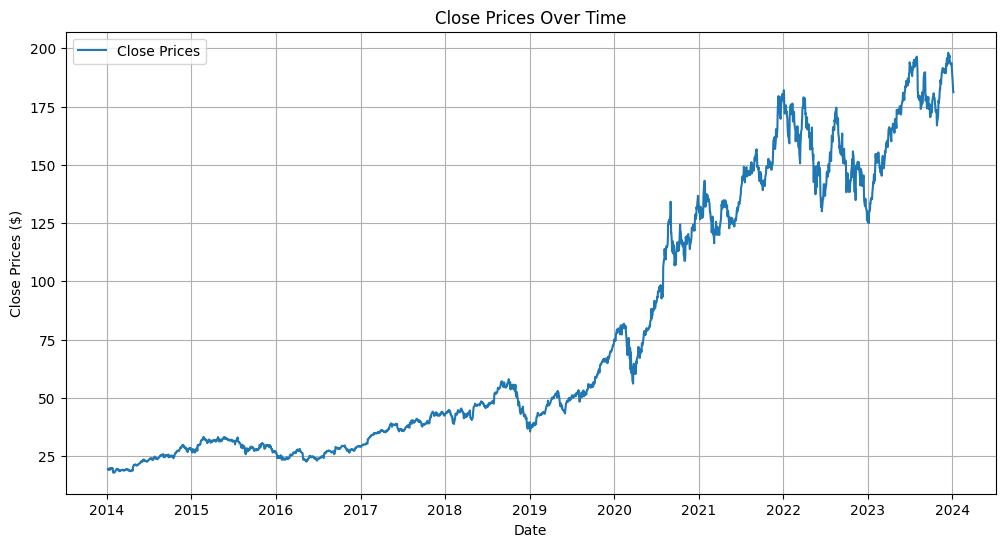

In [73]:
# Create a line plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Prices')

# Formatting
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Prices ($)')
plt.grid(True)
plt.legend()
plt.show()